# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [1]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import style

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [2]:
city_data_df.head()

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban


### Merge the DataFrames

In [3]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban


## Deliverable 1: Get a Summary DataFrame 

In [4]:
#  1. Get the total rides for each city type
rides_by_city_type = pyber_data_df.groupby(["type"]).count()["ride_id"]
rides_by_city_type

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [5]:
# 2. Get the total drivers for each city type
# when merged, pyber_data's driver_count is duplicated by the number of instances a ride ID matches cities
# therefore use city_data_df
drivers_by_city_type = city_data_df.groupby(["type"]).sum()["driver_count"]
drivers_by_city_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

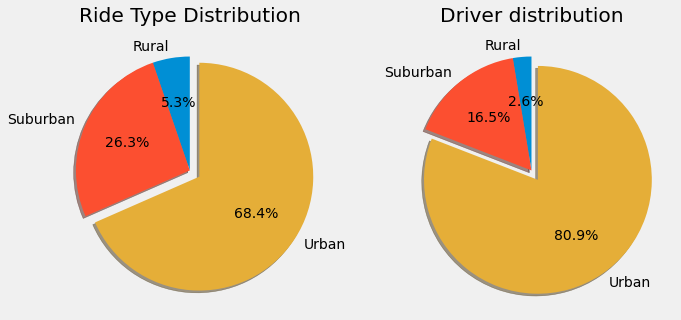

In [14]:
import heapq

# initialize fig & ax
fig,ax=plt.subplots(1,2, figsize=(10, 5))

# use style
style.use('fivethirtyeight')

# initialize array
explode_values=[]

# set values in index to 0 & expand array
for index in rides_by_city_type:
    explode_values.append(0)

#find largest number of rides (can be set for different number of values)
largestvalues = heapq.nlargest(1, range(len(rides_by_city_type)), key = rides_by_city_type.__getitem__)

# explode largest value
for index in largestvalues:
    explode_values[index]= 0.1
       
# use style
style.use('fivethirtyeight')

# plot first ax
ax[0].pie(x=rides_by_city_type,
      explode= explode_values,
      labels = rides_by_city_type.index,
      shadow = True,
      startangle=90,
      autopct='%.1f%%'
      )
ax[0].set(title="Ride Type Distribution")
    
#find largest number of drivers (can be set for different number of values)
largestvalues = heapq.nlargest(1, range(len(drivers_by_city_type)), key = drivers_by_city_type.__getitem__)

# explode largest value
for index in largestvalues:
    explode_values[index]= 0.1    

# use style
style.use('fivethirtyeight')

# plot second ax
ax[1].pie(x=drivers_by_city_type,
      explode= explode_values,
      labels = drivers_by_city_type.index,
      shadow = True,
      startangle=90,
      autopct='%.1f%%'
      )
ax[1].set(title="Driver distribution")

plt.savefig("analysis/Ride_Type_and_Driver_Distribution.png")

# show chart
plt.show()

In [ ]:
#  3. Get the total amount of fares for each city type
total_fares_by_city_type = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fares_by_city_type

In [ ]:
#  4. Get the average fare per city type
average_fare_per_ride_by_type = total_fares_by_city_type.divide(rides_by_city_type)
average_fare_per_ride_by_type

In [ ]:
# 5. Get the average fare per driver for each city type. 
average_fare_per_driver_by_type = total_fares_by_city_type.divide(drivers_by_city_type)
average_fare_per_driver_by_type

In [ ]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame({"Total Rides":rides_by_city_type,
                   "Total Drivers": drivers_by_city_type,
                   "Total Fares":total_fares_by_city_type,
                   "Average Fare per Ride":average_fare_per_ride_by_type,
                   "Average Fare per Driver":average_fare_per_driver_by_type})
pyber_summary_df.head()

In [ ]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df.head()

In [ ]:
#  8. Format the columns.
pyber_summary_df.style.format({
    "Total Rides": "{:,}",
    "Total Drivers": "{:,}",
    "Total Fares": "${:,.2f}",
    "Average Fare per Ride": "${:,.2f}",
    "Average Fare per Driver": "${:,.2f}"
})

## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [ ]:
# 1. Read the merged DataFrame
pyber_data_df.head()

In [ ]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
type_date_df = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]
type_date_df.head()

In [ ]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
index_reset_df = type_date_df.reset_index()
index_reset_df.head()

In [ ]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pivot_table = index_reset_df.pivot(index="date", columns = "type", values = "fare")
pivot_table.head()

In [ ]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
data_by_date_df = pivot_table.loc['2019-01-01':'2019-04-29']
data_by_date_df.head()

In [ ]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
# df.index = pd.to_datetime(df.index)
data_by_date_df.index = pd.to_datetime(data_by_date_df.index)
data_by_date_df.index

In [ ]:
# 7. Check that the datatype for the index is datetime using df.info()
data_by_date_df.info()

In [ ]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
data_by_week_df= data_by_date_df.resample('W').sum()
data_by_week_df.head()

In [ ]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 
# style from matplotlib imported in cell 1

# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')

# initialize figure & axes
fig, axes = plt.subplots(figsize=(20,5))
data_by_week_df.plot(ax=axes)
axes.set(ylabel="Fare ($USD)",
       title="Total Fare by City Type"
      )

# save figure
plt.savefig("analysis/PyBer_fare_summary.png")

# show plot
plt.show()